# Question 1

## Q1.1

This is an optimization problem for constructing a minimum variance portfolio with a target return m. To solve this, we need to minimize the portfolio variance subject to the constraints that the portfolio weights sum to 1(fully invested) and that the expected return of the portfolio equals the target return m. 


The optimization problem is formulated mathematically as:



\begin{aligned}
& \underset{w}{\text{argmin}}\ \frac{1}{2} w^T \Sigma w \\
& \text{s.t.} 
\quad w^T \mathbf{1} = 1, \\
& \mu_{\pi} = w^T \mu = m
\end{aligned}


 We formulate the Lagrangian function by incorporating the constraints into the objective function using Lagrange multipliers. In this case, we have two constraints: the sum of the weights equals 1, and the expected return of the portfolio equals the target return 
m.

We'll use λ and γ as the Lagrange multipliers: The Lagrangian L for the optimization problem is :

$$ L(w, \alpha, \gamma) = \frac{1}{2}w^T\Sigma w - \lambda(m - w^T\mu) - \gamma( 1 -w^T1) $$

Where:
- $w$ is the vector of portfolio weights.
- $\Sigma$ is the covariance matrix of the asset returns.
- $\lambda$ and $\gamma$ are the Lagrange multipliers.
- $\mu$ is the vector of expected returns for the assets.
- $m$ is the target return for the portfolio.
- $1$ is a vector of ones.


 Take the partial derivatives of L with respect to the weights w and set them equal to zero to find the minimum. We also differentiate with respect to λ and γ to enforce the constraints:

$$\frac{\partial \mathcal{L}}{\partial \mathbf{w}} (\mathbf{w}, \lambda, \gamma) = \mathbf{w} \Sigma - \lambda \boldsymbol{\mu} - \gamma \mathbf{1} = 0$$
$$ \frac{\partial L}{\partial \lambda} (w, \lambda, \gamma) = m - w^T\mu  = 0 $$
$$ \frac{\partial L}{\partial \gamma} (w, \lambda, \gamma) = 1 - 1^Tw = 0 $$

We solve this system of equations to determine the optimal weights w for the portfolio given the target return m, using the covariance matrix Σ and the vector of expected returns μ.The covariance matrix Σ represents the inter-relationships between the returns of different assets, which is crucial for understanding the combined risk of a portfolio. It’s needed in portfolio optimization to determine how the assets move together and how their combination can minimize the overall portfolio risk. 

To obtain Σ from standard deviation and the correlation matrix R, you use:
$\Sigma = SRS$.



The analytical solution for w∗ optimal allocations can be written as: 

$$ w^* = \Sigma^{-1}(\lambda \mu + \gamma 1) $$

where
$$
\begin{align}
\lambda &= \frac{Am - B}{AC - B^2}\\

\gamma &= \frac{C - Bm}{AC - B^2}
\end{align}
$$

and

$$
\begin{align}
A &= 1^T (\Sigma)^{-1} \\

B &= \mu^T (\Sigma)^{-1} \\
 
C &= \mu^T (\Sigma)^{-1} \mu
\end{align}
$$

Compute allocations w∗ and portfolio risk σΠ =
√
w′Σw, for m = 4.5%

In [34]:
# Import Libraries

import numpy as np
import pandas as pd

In [35]:
assets = ['Asset A', 'Asset B', 'Asset C', 'Asset D']

# Given data
mu = np.array([0.02, 0.07, 0.15, 0.20])  # Expected returns for assets A, B, C, D

# Given standard deviations and correlation matrix R
std_devs = np.array([0.05, 0.12, 0.17, 0.25])
R = np.array([
    [1, 0.3, 0.3, 0.3],
    [0.3, 1, 0.6, 0.6],
    [0.3, 0.6, 1, 0.6],
    [0.3, 0.6, 0.6, 1]
])


In [36]:
# Target return
m = 0.045

In [37]:
# The covariance matrix is constructed from the volatilities and the correlation matrix, Sigma = SRS
Sigma = np.outer(std_devs, std_devs) * R
Sigma

array([[0.0025 , 0.0018 , 0.00255, 0.00375],
       [0.0018 , 0.0144 , 0.01224, 0.018  ],
       [0.00255, 0.01224, 0.0289 , 0.0255 ],
       [0.00375, 0.018  , 0.0255 , 0.0625 ]])

In [38]:
# Vector of ones, four ones
ones = np.ones(len(mu))

 To find the Lagrange multipliers, we set up the following linear system (from earlier discussion):
 
 | 1^T Σ^-1 1  1^T Σ^-1 μ | | λ |  = | 1 |
 
 | μ^T Σ^-1 1  μ^T Σ^-1 μ | | γ | = | m |

In [39]:
# Inverting the covariance matrix, Numpy Linear algebra (numpy.linalg) is used for solving equations and inverting matrices

"""""
The inverse of the covariance matrix,Σ−1, essentially transforms the problem from one of quadratic form (which is more complex to solve directly) to a set of linear equations that can be solved more straightforwardly 
"""""
Sigma_inv = np.linalg.inv(Sigma)

Sigma_inv

array([[455.95854922, -25.90673575, -18.28710759, -12.43523316],
       [-25.90673575, 127.73459988, -32.38341969, -22.02072539],
       [-18.28710759, -32.38341969,  63.64630582, -15.54404145],
       [-12.43523316, -22.02072539, -15.54404145,  29.43005181]])

In [40]:
# Calculating the components of the A matrix
a = ones.T @ Sigma_inv @ ones
b = b2 = mu.T @ Sigma_inv @ ones  # b and b2 are equal because Sigma is symmetric
c = mu.T @ Sigma_inv @ mu

In [41]:
A_matrix = np.array([
    [a, b],
    [b, c]
])

In [42]:
# Right-hand side of the linear system
B = np.array([1, m])

In [43]:
# Solving for lambda_1 and lambda_2 using the correct matrix equation AX = B
multipliers = np.linalg.solve(A_matrix, B)
lambda_1, gamma = multipliers

In [44]:
# Computing the optimal weights w*
w_star = lambda_1 * Sigma_inv @ ones + gamma * Sigma_inv @ mu

In [45]:
# Computing the portfolio risk sigma_pi
portfolio_risk = np.sqrt(w_star.T @ Sigma @ w_star)


In [46]:
import pandas as pd

Optimal_Weights = pd.DataFrame({
    'Asset': assets,
    'Optimal Weights': w_star,
})

# Set the asset names as the index
Optimal_Weights.set_index('Asset', inplace=True)

Optimal_Weights


,Optimal Weights
Asset,
Asset A,0.785111
Asset B,0.053864
Asset C,0.133555
Asset D,0.027470


In [47]:
print(f'The portfolio risk is: {round(portfolio_risk,4)*100}% ')

The portfolio risk is: 5.84% 


The results represent a portfolio optimization solution, where the goal was to find the optimal allocations w∗ of assets that minimize the portfolio's variance while achieving a target return of 4.5%. Asset A: This asset has the highest allocation at approximately 78.51%. This suggests that to achieve the target return with minimal risk, a large proportion of the portfolio should be invested in Asset A which is not surprising given it had a relativly low standard deviation. The risk of the optimized portfolio, given these allocations, is  5.84%. This value is the standard deviation of the portfolio's returns and is a measure of the portfolio's total risk. 

## Question 1.2

Instead of computing other optimal allocations by formula, let’s conduct an experiment.

• Generate above 700 random allocation sets: 4 × 1 vectors. Each set has to satisfy the constraint
w
′1 = 1. In fact, once you generate three random numbers w1, w2, w3, the 4th can be computed.

• Weights will not be optimal and can be negative.

In [88]:
import numpy as np
import pandas as pd

# Number of random allocation sets to generate
num_allocations = 800

# Initialize an array to hold the allocation sets
allocation_sets = np.zeros((num_allocations, 4))

In [101]:
# Generate 800 random allocation sets
for i in range(num_allocations):
    # Randomly generate the first three weights including negative numbers
    w = np.random.uniform(-1, 1, 3)
    # Determine the fourth weight such that the sum is 1
    w = np.append(w, 1 - np.sum(w))
    # Store the allocation set
    allocation_sets[i] = w

In [102]:
# Show the first 10 allocation sets as a sample
allocation_sets[:10]

array([[ 0.0132485 ,  0.34357828, -0.15605418,  0.7992274 ],
       [-0.13099766,  0.38477468, -0.9527614 ,  1.69898438],
       [-0.35747484,  0.27768401,  0.90941556,  0.17037527],
       [-0.33471804,  0.80568724,  0.32428825,  0.20474255],
       [-0.50824768, -0.52357524,  0.09304775,  1.93877516],
       [ 0.79665548,  0.84674028, -0.291875  , -0.35152077],
       [ 0.26130757,  0.82327882, -0.45359808,  0.36901169],
       [-0.35534225,  0.81939774, -0.11127026,  0.64721477],
       [-0.42072368,  0.60970357,  0.59764612,  0.21337399],
       [-0.5368438 ,  0.7684748 ,  0.96232245, -0.19395344]])

• Compute µΠ = w′µ and σΠ =
√
w′Σw for each set.

In [103]:
# Initialize arrays to hold the portfolio expected return and standard deviation
portfolio_returns = np.zeros(num_allocations)
portfolio_std_devs = np.zeros(num_allocations)

In [104]:
# Compute expected return and standard deviation for each allocation set
for i in range(num_allocations):
    w = allocation_sets[i]
    portfolio_returns[i] = np.dot(w, mu)
    portfolio_std_devs[i] = np.sqrt(np.dot(w.T, np.dot(Sigma, w)))

In [106]:
# Combine the results in a df
portfolio_metrics = pd.DataFrame({
    'Expected Return': portfolio_returns,
    'Standard Deviation': portfolio_std_devs
})

In [107]:
portfolio_metrics[:10]

,Expected Return,Standard Deviation
0,0.160753,0.211244
1,0.221197,0.373643
2,0.182776,0.201148
3,0.139295,0.170203
4,0.354897,0.452286
5,-0.038880,0.098516
6,0.068618,0.136159
7,0.163003,0.217112
8,0.166586,0.190241
9,0.148614,0.195496


• Plot points with coordinates µΠ on the vertical axis and σΠ on the horistonal axis.
Identify the shape and explain this plot.

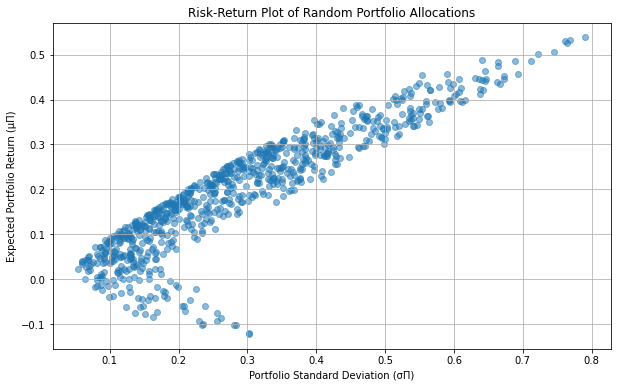

In [108]:
import matplotlib.pyplot as plt

# Plot the points
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_std_devs, portfolio_returns, alpha=0.5)
plt.title('Risk-Return Plot of Random Portfolio Allocations')
plt.xlabel('Portfolio Standard Deviation (σΠ)')
plt.ylabel('Expected Portfolio Return (μΠ)')
plt.grid(True)

# Show the plot
plt.show()

The plot displays the expected portfolio return (μΠ) on the vertical axis against the portfolio standard deviation (σΠ) on the horizontal axis.

Typically, in a risk-return plot like this, you might expect to see a pattern or shape that illustrates the trade-off between risk and return. For well-diversified portfolios, the points often form the upper section of a parabola, known as the efficient frontier, where for any given level of risk, the portfolio on the frontier has the highest expected return.

The shape of the plot is roughly elliptical, spreading out mainly along a diagonal line from the bottom left to the top right. This indicates that there is generally a positive relationship between risk and return among these random portfolios: as risk increases, the expected return tends to increase as well. 

From the plot, we can observe that the points are somewhat scattered, showing that as risk (standard deviation) increases, expected return varies widely due to the randomness of the allocation, including both positive and negative expected returns.